<a href="https://colab.research.google.com/github/Sachinsachin21/Machine_learning/blob/main/NLP_hotel_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install nltk

In [115]:
import nltk
import re
import tkinter as tk
from tkinter import ttk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as ps
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [116]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [117]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
p = pd.read_csv("Restaurant_Reviews.tsv",sep='\t' )
p.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [119]:
p.shape

(1000, 2)

In [120]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [121]:
p.isnull().sum()

,0
Review,0
Liked,0


In [122]:
p.isna().any()

,0
Review,False
Liked,False


In [123]:
p.drop_duplicates(inplace=True)

In [124]:
p.Review.duplicated().any()

False

In [125]:
p.shape

(996, 2)

In [126]:
p.Liked.value_counts()

,count
Liked,
1,499
0,497


In [127]:
sp = p.Review.apply(len)
sp.head()

,Review
0,24
1,18
2,41
3,87
4,59


In [128]:
p['Char_count'] = sp
p.tail()

,Review,Liked,Char_count
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91
999,"Then, as if I hadn't wasted enough of my life ...",0,134


In [129]:
p['Review'] = p['Review'].str.lower()
p.head()

,Review,Liked,Char_count
0,wow... loved this place.,1,24
1,crust is not good.,0,18
2,not tasty and the texture was just nasty.,0,41
3,stopped by during the late may bank holiday of...,1,87
4,the selection on the menu was great and so wer...,1,59


In [130]:
s1 = p.Review.str.split().apply(len)
s1.head()

,Review
0,4
1,4
2,8
3,15
4,12


In [131]:
p['Word_count'] = s1
p.head()

,Review,Liked,Char_count,Word_count
0,wow... loved this place.,1,24,4
1,crust is not good.,0,18,4
2,not tasty and the texture was just nasty.,0,41,8
3,stopped by during the late may bank holiday of...,1,87,15
4,the selection on the menu was great and so wer...,1,59,12


In [132]:
p['Sent_count'] = p.Review.apply(lambda x: len(nltk.sent_tokenize(x)))
p.head()

,Review,Liked,Char_count,Word_count,Sent_count
0,wow... loved this place.,1,24,4,1
1,crust is not good.,0,18,4,1
2,not tasty and the texture was just nasty.,0,41,8,1
3,stopped by during the late may bank holiday of...,1,87,15,1
4,the selection on the menu was great and so wer...,1,59,12,1


In [133]:
p.Sent_count.unique()

array([1, 2, 3])

In [134]:
p.describe()

,Liked,Char_count,Word_count,Sent_count
count,996.000000,996.000000,996.000000,996.000000
mean,0.501004,58.459839,10.919679,1.031124
std,0.500250,32.341292,6.256621,0.179433
min,0.000000,11.000000,1.000000,1.000000
25%,0.000000,33.000000,6.000000,1.000000
50%,1.000000,51.000000,10.000000,1.000000
75%,1.000000,80.000000,15.000000,1.000000
max,1.000000,149.000000,32.000000,3.000000


In [135]:
p[p['Liked']==0]['Char_count'].mean()

60.9738430583501

In [136]:
p[p['Liked']==1]['Char_count'].mean()

55.95591182364729

In [137]:
p.Review[0]

'wow... loved this place.'

In [138]:
r = re.sub('[^a-zA-Z]',' ',p.Review[1])
r

'crust is not good '

In [139]:
review = r.split()
review

['crust', 'is', 'not', 'good']

In [140]:
all = stopwords.words('english')
all.remove('not')
p["all"] = pd.Series([all] * len(p), index=p.index)
p.head()

,Review,Liked,Char_count,Word_count,Sent_count,all
0,wow... loved this place.,1,24,4,1,"[i, me, my, myself, we, our, ours, ourselves, ..."
1,crust is not good.,0,18,4,1,"[i, me, my, myself, we, our, ours, ourselves, ..."
2,not tasty and the texture was just nasty.,0,41,8,1,"[i, me, my, myself, we, our, ours, ourselves, ..."
3,stopped by during the late may bank holiday of...,1,87,15,1,"[i, me, my, myself, we, our, ours, ourselves, ..."
4,the selection on the menu was great and so wer...,1,59,12,1,"[i, me, my, myself, we, our, ours, ourselves, ..."


In [141]:
p1 = [word for word in review if word not in set(all)]
p1

['crust', 'not', 'good']

In [142]:
a = ps()

In [143]:
review = [a.stem(word) for word in review]
review = " ".join(review)
review

'crust is not good'

In [144]:
p.drop(columns=["all"],inplace=True)

In [145]:
p.head()

,Review,Liked,Char_count,Word_count,Sent_count
0,wow... loved this place.,1,24,4,1
1,crust is not good.,0,18,4,1
2,not tasty and the texture was just nasty.,0,41,8,1
3,stopped by during the late may bank holiday of...,1,87,15,1
4,the selection on the menu was great and so wer...,1,59,12,1


In [146]:
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

In [147]:
corpus =[]
a = ps()
stop_words = set(stopwords.words("english")) - custom_stopwords

In [148]:
for index, row in p.iterrows():
    review = re.sub('[^a-zA-Z]', ' ', row['Review'])
    review = review.lower()
    review = review.split()
    review = [a.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [149]:
p['processed_text'] = corpus
p.head()

,Review,Liked,Char_count,Word_count,Sent_count,processed_text
0,wow... loved this place.,1,24,4,1,wow love place
1,crust is not good.,0,18,4,1,crust not good
2,not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,stopped by during the late may bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,the selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [150]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")
wc

In [151]:
pos = wc.generate(p[p['Liked']==1]['processed_text'].str.cat(sep=" "))
pos

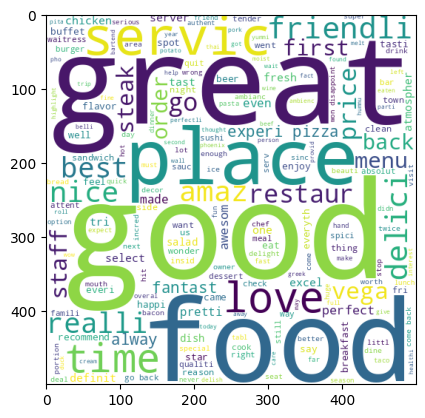

In [152]:
plt.imshow(pos)

In [153]:
negative = wc.generate(p[p['Liked']==0]['processed_text'].str.cat(sep=" "))
negative

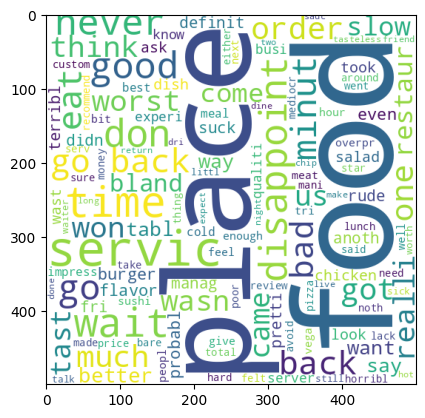

In [154]:
plt.imshow(negative)

In [155]:
p.head()

,Review,Liked,Char_count,Word_count,Sent_count,processed_text
0,wow... loved this place.,1,24,4,1,wow love place
1,crust is not good.,0,18,4,1,crust not good
2,not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,stopped by during the late may bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,the selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [156]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
cv

CountVectorizer(max_features=1500)

In [157]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [158]:
X.shape

(996, 1500)

In [159]:
joblib.dump(cv,"count_v_res")

['count_v_res']

In [160]:
y = p['Liked']
y.sum()

499

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((796, 1500), (200, 1500), (796,), (200,))

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb =GaussianNB()

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.64

In [163]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.805

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.81

In [165]:
joblib.dump(rf,'Restaurant_review_model')

['Restaurant_review_model']